In [90]:
import pandas as pd 
from pycaret import classification
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
import numpy as np 

In [91]:
dir_base = "BASES/"
filename = "_BASE_FIOCRUZ_COVID_UTI_18032023.xlsx"
filename_full = dir_base + filename
df = pd.read_excel(filename_full)

In [92]:
df.head() 

,ID,PRI_ATEND,DIAS_INTERNACAO,FAT_IMP_SINNTOMAS,SEXO,FX_ETAR,CD_COR,CD_ECIV,ID_ESC,USOU_UTI
0,1,1,3,1,1,3,2,1,1,0
1,2,1,2,1,2,3,2,1,1,0
2,3,1,2,2,2,3,2,1,1,0
3,5,1,3,2,1,3,2,1,1,0
4,6,1,2,3,2,3,2,2,1,0


In [93]:
df.shape 

(578, 10)

In [94]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 578 non-null    int64
 1   PRI_ATEND          578 non-null    int64
 2   DIAS_INTERNACAO    578 non-null    int64
 3   FAT_IMP_SINNTOMAS  578 non-null    int64
 4   SEXO               578 non-null    int64
 5   FX_ETAR            578 non-null    int64
 6   CD_COR             578 non-null    int64
 7   CD_ECIV            578 non-null    int64
 8   ID_ESC             578 non-null    int64
 9   USOU_UTI           578 non-null    int64
dtypes: int64(10)
memory usage: 45.3 KB


In [95]:
df.isnull().sum ()

ID                   0
PRI_ATEND            0
DIAS_INTERNACAO      0
FAT_IMP_SINNTOMAS    0
SEXO                 0
FX_ETAR              0
CD_COR               0
CD_ECIV              0
ID_ESC               0
USOU_UTI             0
dtype: int64

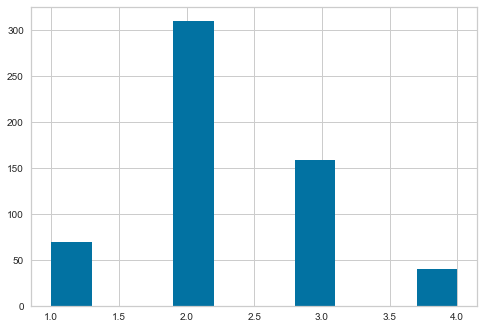

In [96]:
df.DIAS_INTERNACAO.hist();

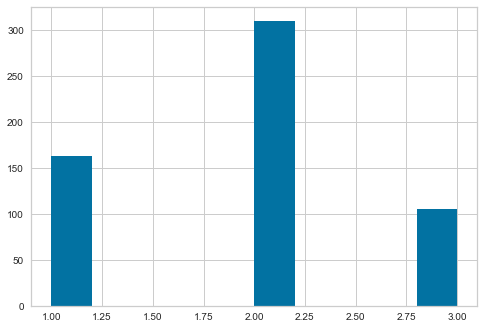

In [97]:
df.FAT_IMP_SINNTOMAS.hist();

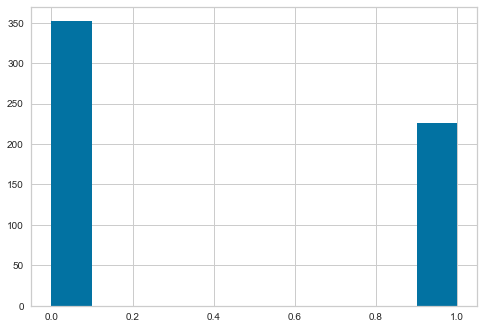

In [98]:
df.USOU_UTI.hist(); 

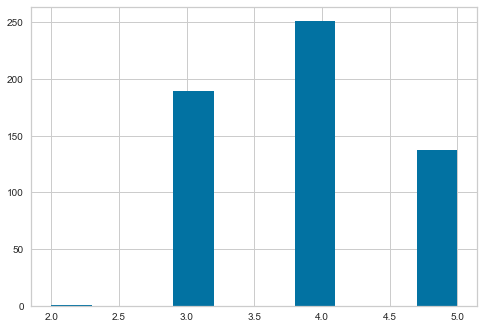

In [99]:
df.FX_ETAR.hist(); 

In [100]:
target_variable = "USOU_UTI" 
numerical_features = ["DIAS_INTERNACAO"]
categorical_features = [i for i in df.columns if i not in ["DIAS_INTERNACAO", "USOU_UTI"]] 

print("Variável resposta = ", target_variable, "\nVariáveis númericas = ", numerical_features, "\nVariáveis categóricas = ", categorical_features)

Variável resposta =  USOU_UTI 
Variáveis númericas =  ['DIAS_INTERNACAO'] 
Variáveis categóricas =  ['ID', 'PRI_ATEND', 'FAT_IMP_SINNTOMAS', 'SEXO', 'FX_ETAR', 'CD_COR', 'CD_ECIV', 'ID_ESC']


In [101]:
label_map = {0: "NÃO USOU UTI", 1: "USOU UTI"}
df.USOU_UTI = df.USOU_UTI.map(label_map)

In [102]:
df.head() 

,ID,PRI_ATEND,DIAS_INTERNACAO,FAT_IMP_SINNTOMAS,SEXO,FX_ETAR,CD_COR,CD_ECIV,ID_ESC,USOU_UTI
0,1,1,3,1,1,3,2,1,1,NÃO USOU UTI
1,2,1,2,1,2,3,2,1,1,NÃO USOU UTI
2,3,1,2,2,2,3,2,1,1,NÃO USOU UTI
3,5,1,3,2,1,3,2,1,1,NÃO USOU UTI
4,6,1,2,3,2,3,2,2,1,NÃO USOU UTI


In [103]:
exp = classification.setup(df,
                            ignore_features=["ID", "ID_ESC"],
                            target=target_variable,
                            numeric_features=numerical_features,
                            categorical_features=categorical_features,
                            fix_imbalance=False,
                            train_size=0.9,
                            session_id=123,
                            silent=True
                           )

,Description,Value
0,session_id,123
1,Target,USOU_UTI
2,Target Type,Binary
3,Label Encoded,"NÃO USOU UTI: 0, USOU UTI: 1"
4,Original Data,"(578, 10)"
5,Missing Values,False
6,Numeric Features,1
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [104]:
model = classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.6500,0.6203,0.3750,0.5864,0.4497,0.2111,0.2270,0.1410
catboost,CatBoost Classifier,0.6327,0.5902,0.3850,0.5527,0.4407,0.1820,0.1948,1.1510
ada,Ada Boost Classifier,0.6250,0.6322,0.3050,0.5279,0.3829,0.1413,0.1539,0.1360
lr,Logistic Regression,0.6231,0.6417,0.3350,0.5194,0.4055,0.1482,0.1568,0.0240
qda,Quadratic Discriminant Analysis,0.6154,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0150
dummy,Dummy Classifier,0.6154,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0060
ridge,Ridge Classifier,0.6115,0.0000,0.3300,0.4999,0.3945,0.1259,0.1336,0.0100
lda,Linear Discriminant Analysis,0.6096,0.6384,0.3400,0.4972,0.4007,0.1261,0.1330,0.0130
nb,Naive Bayes,0.6077,0.5984,0.0500,0.2438,0.0666,0.0067,0.0164,0.0100
lightgbm,Light Gradient Boosting Machine,0.6077,0.5917,0.3800,0.4992,0.4241,0.1365,0.1428,0.4040


In [105]:
previsoes = classification.predict_model(model)
previsoes.head() 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.5172,0.5282,0.3077,0.4444,0.3636,-0.0050,-0.0052


,DIAS_INTERNACAO,PRI_ATEND_1,PRI_ATEND_2,PRI_ATEND_3,FAT_IMP_SINNTOMAS_1,FAT_IMP_SINNTOMAS_2,FAT_IMP_SINNTOMAS_3,SEXO_1,FX_ETAR_2,FX_ETAR_3,...,CD_COR_4,CD_COR_5,CD_ECIV_1,CD_ECIV_2,CD_ECIV_3,CD_ECIV_4,CD_ECIV_5,USOU_UTI,Label,Score
0,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,USOU UTI,USOU UTI,0.7952
1,3.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,USOU UTI,NÃO USOU UTI,0.6703
2,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,USOU UTI,NÃO USOU UTI,0.5341
3,3.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,USOU UTI,USOU UTI,0.5465
4,4.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,NÃO USOU UTI,USOU UTI,0.8937


In [106]:
#model_tuned = classification.tune_model(model, n_iter=50, search_library="scikit-learn")

In [107]:
#classification.plot_model(model, "feature")

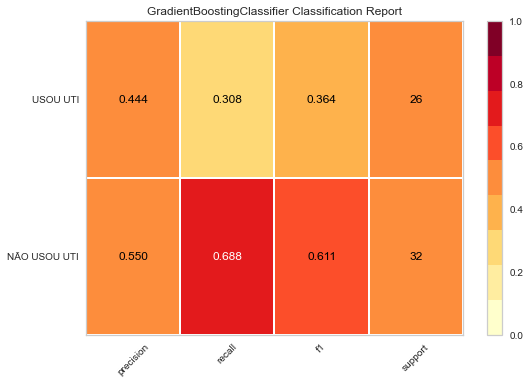

In [108]:
classification.plot_model(model, "class_report")

In [109]:
classification.evaluate_model(model) 

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [110]:
classification.finalize_model(model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [111]:
filename_to_save = "model-covid-uti"
dir_model = "MODELOS/"
classification.save_model(model, model_name=dir_model + filename_to_save)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['PRI_ATEND',
                                                             'FAT_IMP_SINNTOMAS',
                                                             'SEXO', 'FX_ETAR',
                                                             'CD_COR',
                                                             'CD_ECIV'],
                                       display_types=False,
                                       features_todrop=['ID', 'ID_ESC'],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['DIAS_INTERNACAO'],
                                       target='USOU_UTI', time_features=[])),
                 ('imputer',
                  Simple_Imputer(cate...
                                             learning_rate=0.1, loss='deviance',
      